# Caddisfly data

For original publication of this data, see https://doi.org/10.1007/s00027-020-0698-0

In the paper by van der Lee et al. (2020), a model is used to study the impact of discharge dynamics in four Dutch freshwater streams on caddisfly (*Agapetus fuscipes*) populations.  <br>
The example dataset used here is part of the modeled data based on the first year of observations, where there were large fluctuations in water discharge. Only the eggs and first four instar stages are used here, to keep the example small. <br>
The four streams are located in two distinct regions in The Netherlands. The Oude Beek and Seelbeek are located in the Veluwe area, whereas the Bunderbosbeek and Strabekervloedgraaf are located in Zuid-Limburg. The areas will be used here as grouping variables with the streams as replicates for the groups.

## Loading the PhenotypeAnalysis class and data

We start by importing the PhenotypeAnalysis class. For the different import options and more info on this class, see phenotype_analysis_manual.ipynb in the manuals folder.

In [1]:
import sys
sys.path.append('../../src/PhenoFeatureFinder/')

from phenotype_analysis import PhenotypeAnalysis

Now load the dataset as object of this class. Here, we call it 'caddisfly'.

In [2]:
caddisfly = PhenotypeAnalysis(bioassay_csv="./caddisfly_data.csv")

If we now have a look at the top of this dataset, we can see that it has five columns: 
* stream: the names of the streams. Because we decided to use the streams as samples, we'll have to fill in 'stream' when specifying sample_id.
* area: the names of the two regions. When specifying grouping_variable, we'll fill in 'area'.
* day: the time column
* stage: the developmental stages
* number: the counts of each developmental stage per stream at a given time

In [3]:
caddisfly.bioassay.head(5)

,stream,area,day,stage,number
0,bunderbosbeek,limburg,1,eggs,0
1,bunderbosbeek,limburg,11,eggs,361
2,bunderbosbeek,limburg,21,eggs,892
3,bunderbosbeek,limburg,31,eggs,1344
4,bunderbosbeek,limburg,41,eggs,1620


## Preparing the data

Now there are some steps to prepare the data for plotting and the interpretation. The first step is reshape_to_wide.

Here we specify the columns as explained above:

In [4]:
caddisfly.reshape_to_wide(
    sample_id='stream', 
    grouping_variable='area', 
    developmental_stages='stage', 
    count_values='number', 
    time='day')

Because the last developmental stage in this data (fourth_instar) was not counted in separate early and late last stages or removed after counting, we do not need to bother with the combine_seperately_counted_versions_of_last_recorded_stage function. Instead, we can immediately continue with creating the cumulative counts.

In the setup of the data collection, the eggs do not have to be deposited at a specific timepoint, but can instead have been deposited over the entire duration of the collection period. In this case, the egg count should therefore also be made cumulative to get a true grasp of the total number of eggs. To do this, we count 'eggs' as first_stage, 'first_instar' as second_stage, and so on until 'fourth_instar' as fifth_stage. This means we also have to change n_developmental_stages to 5.

In [5]:
caddisfly.convert_counts_to_cumulative(
    n_developmental_stages=5, 
    sample_id='stream', 
    eggs='eggs', 
    first_stage='eggs', 
    second_stage='first_instar', 
    third_stage='second_instar', 
    fourth_stage='third_instar', 
    fifth_stage='fourth_instar')

## Creating plots

After creating the cumulative data, we can start with the plotting. The first step is to order the grouping variable. In this case, we're using area as grouping variable, so at order_of_groups we fill in the two regions:

In [6]:
caddisfly.prepare_for_plotting(order_of_groups=['veluwe', 'limburg'])

Now, let's first make some boxplots:

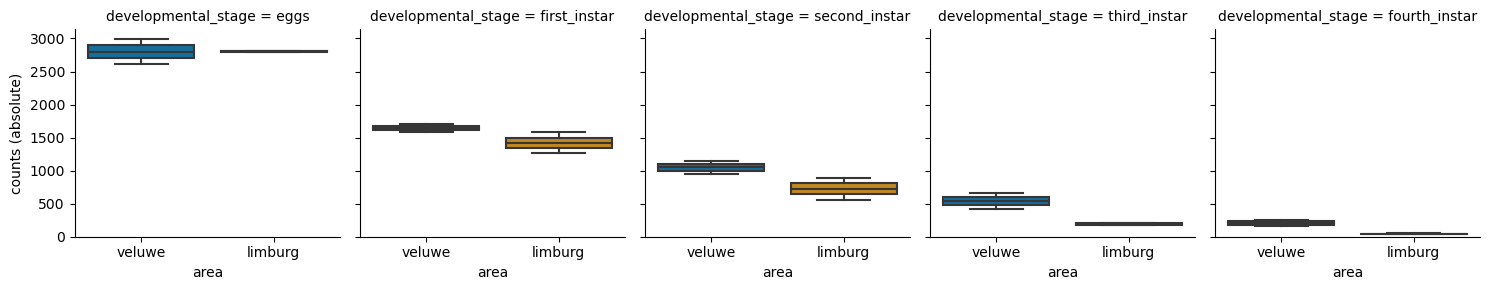

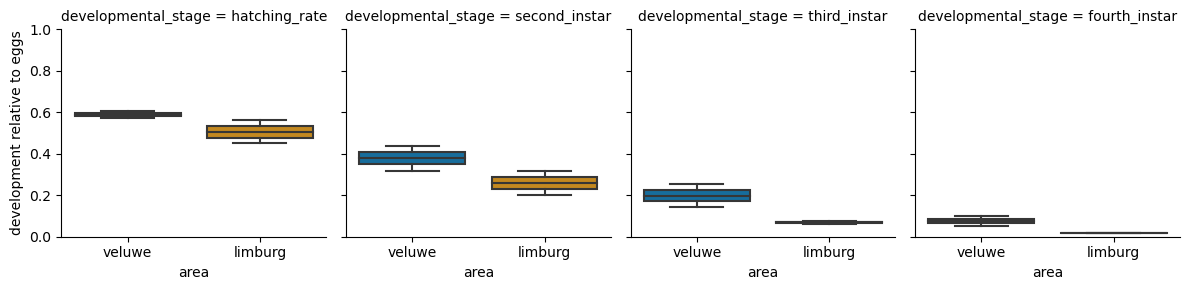

In [7]:
caddisfly.plot_counts_per_stage(
    grouping_variable='area', 
    sample_id='stream',
    eggs='eggs', 
    first_stage='first_instar', 
    second_stage='second_instar', 
    third_stage='third_instar', 
    fourth_stage='fourth_instar', 
    make_nymphs_relative_to='eggs',
    absolute_x_axis_label='area',
    absolute_y_axis_label='counts (absolute)',
    relative_x_axis_label='area',
    relative_y_axis_label='development relative to eggs')

We can see that only a portion of the larvae is able to develop to the next stage. Furthermore, its seems that the portion of larvae to developing to each next stage is larger in the Veluwe streams than in Limburg.

The next step is to have a more detailed look at the development to a specific developmental stage of interest. Based on the boxplots, the development from 2<sup>nd</sup> to 3<sup>rd</sup> instar could be interesting to have a look at:

            slope(±sd) maximum(±sd)     emt50(±sd)  reduced_chi2
area                                                            
veluwe    -6.28(±1.01)  0.53(±0.03)  139.86(±4.20)      7.366027
limburg  -16.84(±4.27)  0.27(±0.01)  109.11(±1.87)      5.401331


/Users/lissydenkers/Documents/GitHub/phloemfinder/example_data/caddisfly/../../src/phloemfinder/phenotype_analysis.py:761: RuntimeWarning: invalid value encountered in log
  return(maximum/(1+np.exp(slope*(np.log(x)-np.log(emt50)))))


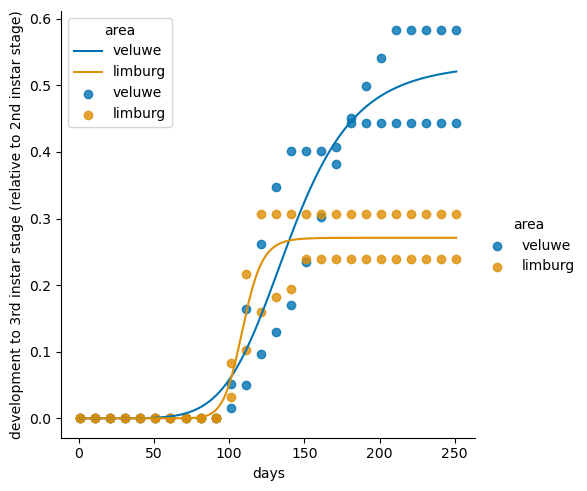

In [8]:
caddisfly.plot_development_over_time_in_fitted_model(
    sample_id='stream', 
    grouping_variable='area',
    time='day',
    stage_of_interest='third_instar',
    use_relative_data=True, 
    make_nymphs_relative_to='second_instar',
    x_axis_label='days',
    y_axis_label='development to 3rd instar stage (relative to 2nd instar stage)',
    predict_for_n_days=0)

In this plot we can see that in the streams in limburg, the development seems to be abruptly hampered around day 120 (early July), while this is not the case for the streams at the Veluwe.
When going back to the original publication, we can see that this indeed coincides with a high peak in water discharge.

The fit of the curves is not optimal, as you can see at the slightly high reduced_chi2 score. This should optimally equal to (or close to) the sample size. However, considering the extremely small sample size of 2, a sub-optimal fit is to be expected. For real world uses, it is advisable to have a larger sample size.